In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("C:\\Users\\User\\Desktop\\internship's project\\big mart sales\\Train.csv")
test = pd.read_csv("C:\\Users\\User\\Desktop\\internship's project\\big mart sales\\Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
test.isnull().sum(0) / test.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [11]:
#this is not necessary , when we have already checked this using .info()

categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


C:\Users\User\AppData\Local\Temp\ipykernel_7680\1322891318.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = train.select_dtypes(include =[np.object])


In [12]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


C:\Users\User\AppData\Local\Temp\ipykernel_7680\2622687559.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = test.select_dtypes(include =[np.object])


In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
train['Item_Weight'].isnull().sum() , test['Item_Weight'].isnull().sum()

(1463, 976)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

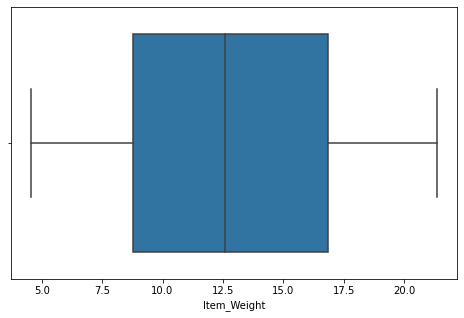

In [17]:
plt.figure(figsize=(8,5))   
sns.boxplot('Item_Weight',data=train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

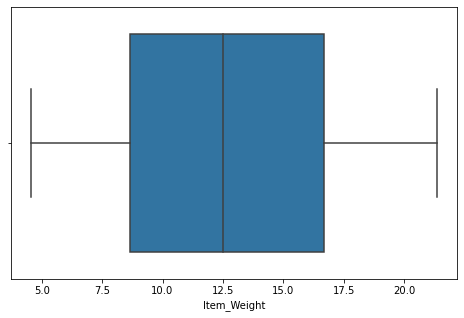

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

In [19]:
#filling the null values with mean value in the column "Item_Weight"
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [20]:
train["Item_Weight"].isnull().sum(),test["Item_Weight"].isnull().sum()

(0, 0)

In [21]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode())
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode())

train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [22]:
train['Outlet_Size'].value_counts() , test['Outlet_Size'].value_counts()

(Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Medium    1862
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64)

In [23]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(0, 0)

In [24]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
#just merged the 2-3 row into a single row..
train["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2023 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)
print(train["Item_Fat_Content"].value_counts())
print(train["Years_Established"].head())
print(test["Years_Established"].head())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
0    24
1    14
2    24
3    25
4    36
Name: Years_Established, dtype: int64
0    24
1    16
2    25
3    16
4    38
Name: Years_Established, dtype: int64


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

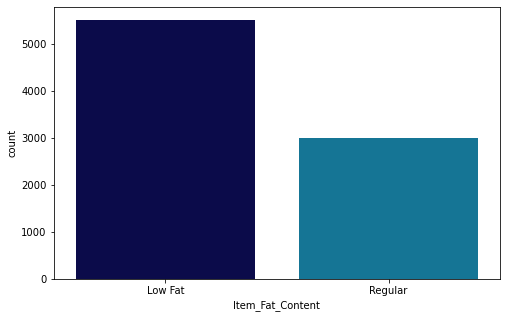

In [26]:
#DATA VISUALIZATION

plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')


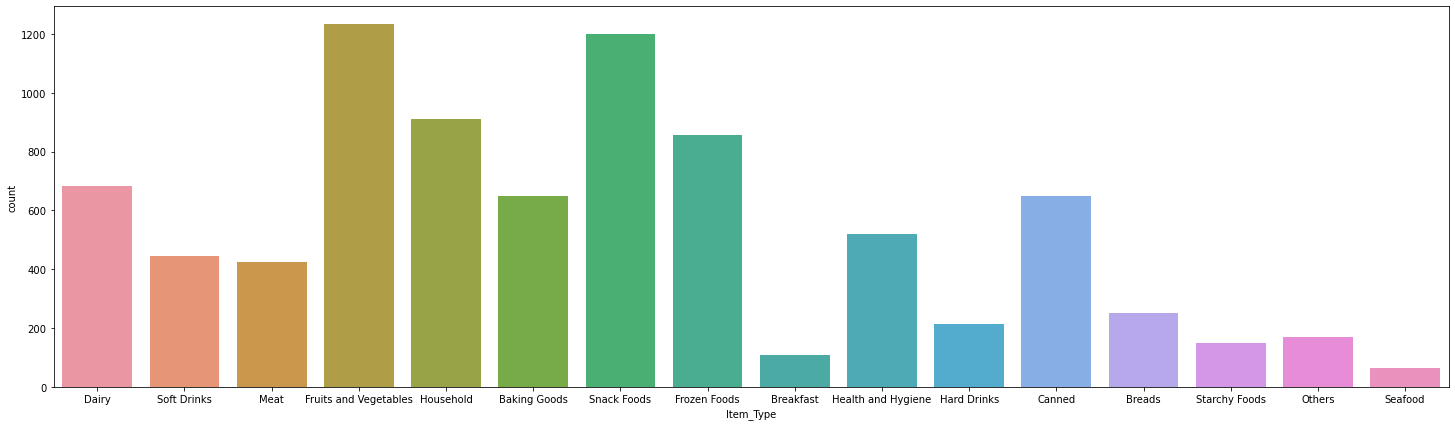

In [27]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=train)
plt.show()

In [28]:
#Observation

#Fruits and Vegis, Snack Foods have good sales
#Household and Frozen foods also have good sales

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

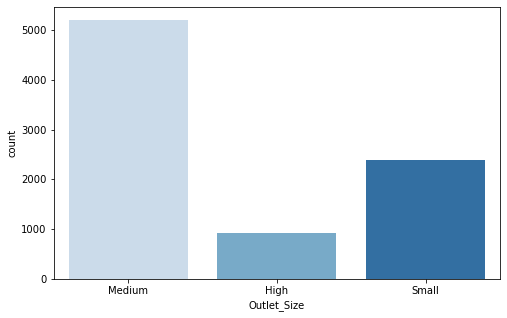

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='Blues')

In [30]:
#Observation

#Medium outlet_Size are more number of outlet, Hight Outlet have low number
#Based on observation that Hight outlet size have more maintainance and high
#captial investment required so their count is very low

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

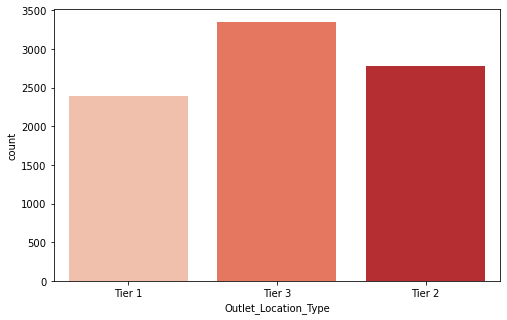

In [31]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='Reds')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

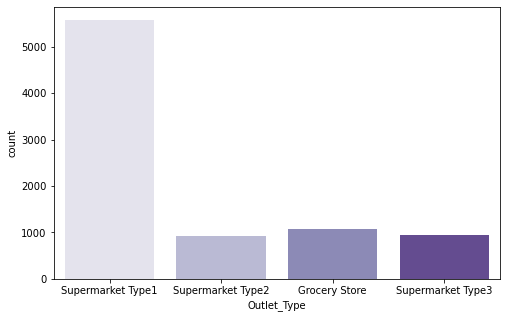

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='Purples')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

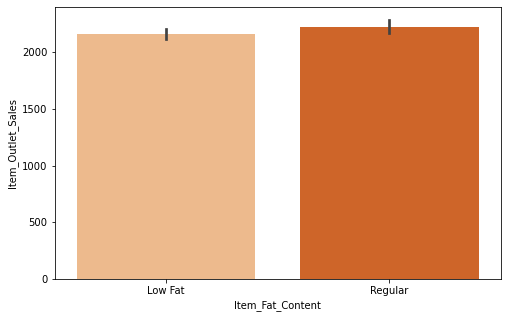

In [33]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='Oranges')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

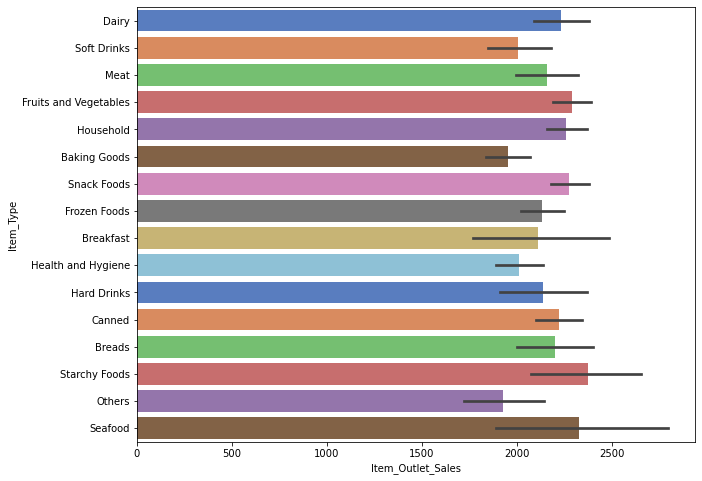

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='muted')

In [35]:
#Observation - The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and
#Starchy Foods seems higher and hence the sales can be improved with having stock of products that are
#most bought by customers

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

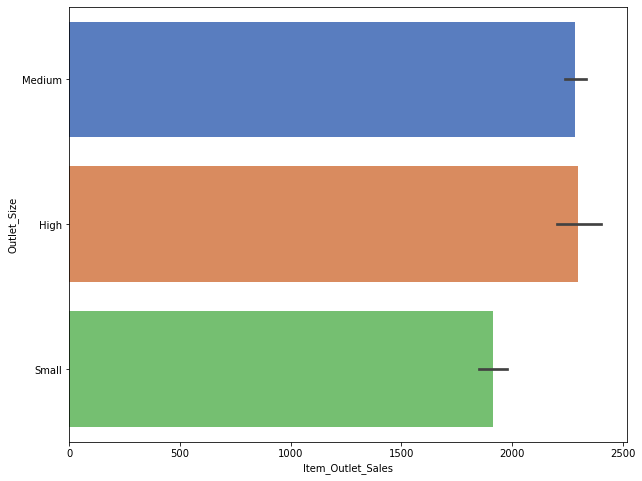

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(y='Outlet_Size',x='Item_Outlet_Sales',data=train,palette='muted')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


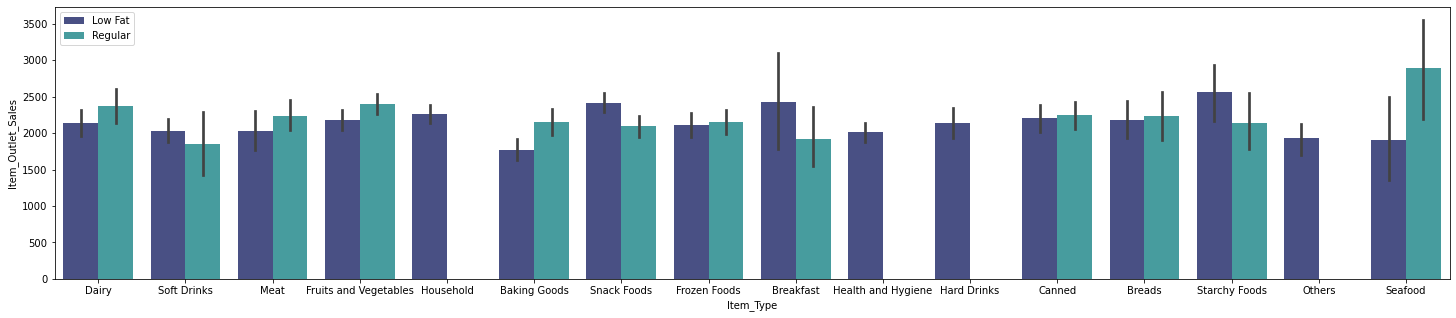

In [37]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


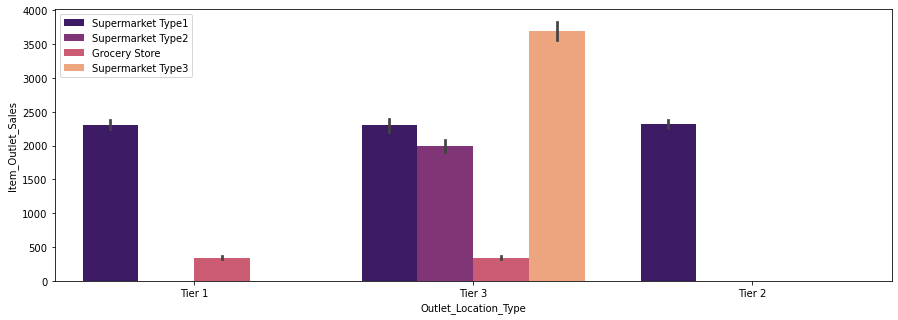

In [38]:
plt.figure(figsize=(15,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

In [39]:
#label encoding
encoder = LabelEncoder()

In [40]:
var = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var:
    train[i] = encoder.fit_transform(train[i])
    
for i in var:
    test[i] = encoder.fit_transform(test[i])

In [41]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,24
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,14
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,24
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,25
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,36


In [42]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
Y= train['Item_Outlet_Sales']

In [43]:
#splitting into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [44]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)
X_train_std

array([[ 1.52290029, -0.74155088,  0.68469729, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.23985603, -0.74155088, -0.09514748, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 1.54667616,  1.34852514, -0.00838589, ..., -0.13870429,
        -0.25964107, -1.10135721],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ..., -1.36527477,
        -0.25964107,  0.09214738],
       [-0.74888428,  1.34852514,  1.21363058, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 0.67885683, -0.74155088,  1.83915356, ...,  1.08786619,
         0.98524841, -1.34005813]])

In [45]:
X_test_std

array([[-0.43860915, -0.74155088, -0.21609255, ...,  1.08786619,
         0.98524841, -1.34005813],
       [ 1.22570189, -0.74155088, -0.52943461, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.21845775,  1.34852514,  0.16277342, ..., -1.36527477,
        -0.25964107,  0.09214738],
       ...,
       [ 0.65508096, -0.74155088,  0.87824237, ...,  1.08786619,
        -1.50453056, -0.02720308],
       [ 1.01171904, -0.74155088, -1.28409256, ...,  1.08786619,
         0.98524841, -1.34005813],
       [-1.56558548,  1.34852514, -1.09265374, ..., -0.13870429,
        -0.25964107, -0.50460492]])

In [46]:
print(Y_train,Y_test)

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64 8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [47]:
import joblib
joblib.dump(sc, 'sc1.sav')

['sc1.sav']

In [48]:
#Model Building

from xgboost import XGBRegressor
regressor = XGBRegressor()

regressor.fit(X_train, Y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [49]:
sales_data_prediction = regressor.predict(X_train)

In [50]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8528588471912233


In [51]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [52]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)
print('R Squared value = ', r2_data)

R Squared value =  0.5301904229890263


In [53]:
joblib.dump(regressor,'regressor.sav')

['regressor.sav']